# Modul 4 Persamaan Diferensial Numerik

Kembali ke [Persamaan Diferensial Numerik](./pdnum2024genap.qmd)

## Metode Multistep Eksplisit: Metode $n$-step Adams-Bashforth

Metode-metode sebelumnya, seperi Euler, Runge-Kutta, dan kawan-kawannya adalah metode jenis one-step, karena di tiap iterasinya kita hanya menggunakan informasi dari satu nilai $t_{i}$. Berikut kita akan mulai membahas mengenai metode multistep, di mana kita menggunakan lebih dari satu nilai $t_{i}$ untuk membuat aproksimasi.

Terdapat dua jenis metode multistep, yaitu:

- Multistep eksplisit, di mana kita mengaproksimasi nilai pada $t_{i+1}$ menggunakan nilai $t$ sebelumnya.

- Multistep implisit, di mana kita mengaproksimasi nilai pada $t_{i+1}$ menggunakan nilai pada $t$ sebelumnya, sekaligus nilai pada $t_{i+1}$ itu sendiri.

Metode multistep eksplisit yang akan kita bahas adalah **metode $n$-step Adams-Bashforth.**

Metode $n$-step Adams-Bashforth menggunakan $n$ titik sebelumnya untuk mengaproksimasi nilai. Karena metode ini adalah metode multistep, maka $n$ nilai awalnya pun harus diperoleh terlebih dahulu. Misal kita ingin menggunakan metode Adams-Bashforth orde 3 , maka $w_{1}, w_{2}$, dan $w_{3}$ harus ada terlebih dahulu sebelum dilanjutkan ke metode Adams-Bashforth. Nilai-nilai awal tersebut dapat diperoleh dari metode-metode one-step sebelumnya, seperti metode Runge-Kutta (biasanya digunakan metode Runge-Kutta orde 4).

Berikut rumus untuk metode $n$-step Adams-Bashforth, masing-masing sesuai dengan jumlah step nya.

### Two-step Adams-Bashforth

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \\
w_{i+1}=w_{i}+\frac{h}{2}\left[3 f\left(t_{i}, w_{i}\right)-f\left(t_{i-1}, w_{i-1}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_1 \hspace{0.2cm} \text{(hitung dengan metode Runge-Kutta orde 4)}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
w_{i+1}=w_{i}+\frac{h}{2}\left[3 m_1-m_2\right]
\end{gathered}
$$

In [ ]:
function [t, w] = adams_bashforth2(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2) menggunakan metode Runge-Kutta orde 4
  i = 1;
  t(i + 1) = t(i) + h;
  k1 = h * f(t(i), w(i));
  k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
  k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
  k4 = h * f(t(i + 1), w(i) + k3);
  w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  
  % Algoritma utama Adams-Bashforth orde 2
  for i = 2 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    w(i+1) = w(i) + (h/2) * (3*m1 - m2);
  endfor
endfunction

Misalkan diberikan MNA sebagai berikut, yang ingin diselesaikan secara numerik dengan $N = 10$:

$$y' = y - t^2 + 1$$
$$0 \le t \le 2$$
$$y(0) = 0.5$$

yang kebetulan memiliki solusi eksak:

$$y\left(t\right) = \left( t + 1 \right)^2 - 0.5 e^t$$

Contoh penggunaan:

ans =

        0   0.5000   0.5000        0
   0.2000   0.8293   0.8293   0.0000
   0.4000   1.2161   1.2141   0.0020
   0.6000   1.6540   1.6489   0.0050
   0.8000   2.1366   2.1272   0.0093
   1.0000   2.6561   2.6409   0.0153
   1.2000   3.2033   3.1799   0.0234
   1.4000   3.7667   3.7324   0.0343
   1.6000   4.3324   4.2835   0.0489
   1.8000   4.8834   4.8152   0.0682
   2.0000   5.3992   5.3055   0.0937



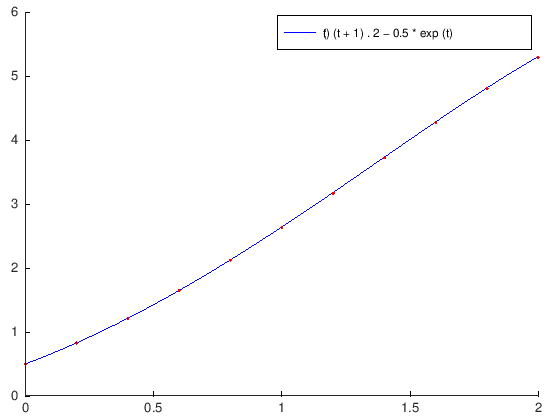

In [ ]:
f = @(t, y) y - t .^ 2 + 1;
a = 0;
b = 2;
alpha = 0.5;
N = 10;

[t, w] = adams_bashforth2(f, a, b, N, alpha);

sln = @(t) (t + 1) .^ 2 - 0.5 * exp(t);
y_eksak = sln(t);

err_ab2 = abs(y_eksak - w);

[t, w, y_eksak, err_ab2]

hold on;
fplot(sln, [0, 2], 'b');
scatter(t1, w1, 'r');

### Three-step Adams-Bashforth

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \\
w_{i+1}=w_{i}+\frac{h}{12}\left[23 f\left(t_{i}, w_{i}\right)-16 f\left(t_{i-1}, w_{i-1}\right)+5 f\left(t_{i-2}, w_{i-2}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
w_{i+1}=w_{i}+\frac{h}{12}\left[23 m_1-16 m_2+5 m_3\right]
\end{gathered}
$$

In [ ]:
function [t, w] = adams_bashforth3(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 2
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 3
  for i = 3 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    w(i+1) = w(i) + (h/12) * (23*m1 - 16*m2 + 5*m3);
  endfor
endfunction

### Four-step Adams-Bashforth

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \quad w_{3}=\alpha_{3} \\
w_{i+1}=w_{i}+\frac{h}{24}\left[55 f\left(t_{i}, w_{i}\right)-59 f\left(t_{i-1}, w_{i-1}\right)+37 f\left(t_{i-2}, w_{i-2}\right)-9 f\left(t_{i-3}, w_{i-3}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \quad w_{4}=\alpha_{3} \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
m_4 = f\left(t_{i-3}, w_{i-3}\right) \\
w_{i+1}=w_{i}+\frac{h}{24}\left[55 m_1-59 m_2+37 m_3-9 m_4\right]
\end{gathered}
$$

In [ ]:
function [t, w] = adams_bashforth4(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), w(3), w(4) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 3
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 4
  for i = 4 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    m4 = f(t(i-3), w(i-3));
    w(i+1) = w(i) + (h/24) * (55*m1 - 59*m2 + 37*m3 - 9*m4);
  endfor
endfunction

### Five-step Adams-Bashforth

$$
\begin{gathered}
w_{0}=\alpha, \quad w_{1}=\alpha_{1}, \quad w_{2}=\alpha_{2}, \quad w_{3}=\alpha_{3}, \quad w_{4}=\alpha_{4}, \\
w_{i+1}=w_{i}+\frac{h}{720}\left[1901 f\left(t_{i}, w_{i}\right)-2774 f\left(t_{i-1}, w_{i-1}\right)+2616 f\left(t_{i-2}, w_{i-2}\right)\right. \\
\left.-1274 f\left(t_{i-3}, w_{i-3}\right)+251 f\left(t_{i-4}, w_{i-4}\right)\right]
\end{gathered}
$$

Bisa ditulis:

$$
\begin{gathered}
w_{1}=\alpha, \\
w_{2}=\alpha_{1}, \quad w_{3}=\alpha_{2}, \quad w_{4}=\alpha_{3}, \quad w_{5}=\alpha_{4}, \\
m_1 = f\left(t_{i}, w_{i}\right) \\
m_2 = f\left(t_{i-1}, w_{i-1}\right) \\
m_3 = f\left(t_{i-2}, w_{i-2}\right) \\
m_4 = f\left(t_{i-3}, w_{i-3}\right) \\
m_5 = f\left(t_{i-4}, w_{i-4}\right) \\
w_{i+1}=w_{i}+\frac{h}{720}\left[1901 m_1-2774 m_2+2616 m_3\right. \\
\left.-1274 m_4+251 m_5\right]
\end{gathered}
$$

In [ ]:
function [t, w] = adams_bashforth4(f, a, b, N, alpha)
  % Inisiasi variabel awal
  h = (b - a) / N;
  t = zeros(N + 1, 1);
  w = zeros(N + 1, 1);
  t(1) = a;
  w(1) = alpha;
  
  % Hitung w(2), ..., w(5) menggunakan metode Runge-Kutta orde 4
  for i = 1 : 4
      t(i + 1) = t(i) + h;
      k1 = h * f(t(i), w(i));
      k2 = h * f(t(i) + (h/2), w(i) + (k1/2));
      k3 = h * f(t(i) + (h/2), w(i) + (k2/2));
      k4 = h * f(t(i + 1), w(i) + k3);
      w(i+1) = w(i) + (k1 + 2*k2 + 2*k3 + k4) / 6;
  endfor
  
  % Algoritma utama Adams-Bashforth orde 5
  for i = 5 : N
    t(i + 1) = t(i) + h;
    m1 = f(t(i), w(i));
    m2 = f(t(i-1), w(i-1));
    m3 = f(t(i-2), w(i-2));
    m4 = f(t(i-3), w(i-3));
    m5 = f(t(i-4), w(i-4));
    w(i+1) = w(i) + (h/720) * (1901*m1 - 2774*m2 + 2616*m3 -1274*m4 +251*m5);
  endfor
endfunction